In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
data = pd.read_csv('USDJPY-2019-01.csv', names=['pair', 'datetime', 'low', 'high'])

In [3]:
data.head(2)

,pair,datetime,low,high
0,USD/JPY,20190101 22:06:11.323,109.630,109.697
1,USD/JPY,20190101 22:06:11.567,109.625,109.697


In [4]:
def calcMACD(data):
    data_26_days_ema = data.ewm(span=26).mean()
    data_12_days_ema = data.ewm(span=12).mean()
    
    macd_low = data_12_days_ema.low - data_26_days_ema.low
    macd_high = data_12_days_ema.high - data_26_days_ema.high
    
    return pd.DataFrame({'pair': data.pair, 'datetime': data.datetime, 'macd_low': macd_low, 'macd_high': macd_high})

In [5]:
macd =calcMACD(data)

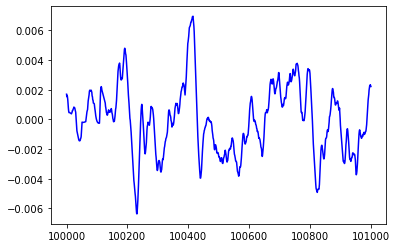

In [6]:
plt.plot(macd.macd_high[100000:101000], 'b')

In [8]:
def calcRSI(data):
    high = data.high.diff()
    low = data.low.diff()
    
    high_gain = high.copy()
    high_gain[high_gain< 0] = 0

    high_loss = high.copy()
    high_loss[high_loss> 0] = 0

    low_gain = low.copy()
    low_gain[low_gain< 0] = 0

    low_loss = low.copy()
    low_loss[low_loss> 0] = 0
    
    gain_loss_ratio_high = high_gain.rolling(14).mean()/high_loss.rolling(14).mean()
    gain_loss_ratio_low = low_gain.rolling(14).mean()/low_loss.rolling(14).mean()
    
    rsi_high = gain_loss_ratio_high.apply(lambda val: 100 - 100/(1+ np.abs(val)))
    rsi_low = gain_loss_ratio_low.apply(lambda val: 100 - 100/(1+ np.abs(val)))
    
    return pd.DataFrame({'pair': data.pair, 'datetime': data.datetime, 'rsi_low': rsi_low, 'rsi_high': rsi_high})

In [9]:
rsi = calcRSI(data)

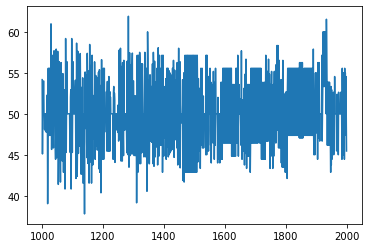

In [11]:
plt.plot(rsi.rsi_high[1000:2000])